In [1]:
import sys, os
sys.path.append(os.path.abspath('../src'))

from data_processor import DataProcessor

############ 1 Data Processing ############

# Define file path 
file_path = '../data/raw/data_factory_1.xlsx'  
dp = DataProcessor(file_path)
dp.change_pivot('timestamp', 'param_name', 'value')
dp.list_columns()


['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'DifferentialPressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'Permeate Pressure', 'PermeateConductivity', 'PermeateFlow', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'DifferentialPressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'Permeate Pressure',
 'PermeateConductivity',
 'PermeateFlow',
 'Recovery']

In [2]:
dp.rename_column_to_timestamp('timestamp')
dp.rename_column_to_permeatepressure('Permeate Pressure')
dp.list_columns()

['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'DifferentialPressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'PermeatePressure', 'PermeateConductivity', 'PermeateFlow', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'DifferentialPressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'PermeatePressure',
 'PermeateConductivity',
 'PermeateFlow',
 'Recovery']

In [3]:
dp.drop_NA_with_feature(features=['FeedFlow','FeedTemperature'])

In [4]:
dp.list_columns()

['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'DifferentialPressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'PermeatePressure', 'PermeateConductivity', 'PermeateFlow', 'Recovery']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'DifferentialPressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'PermeatePressure',
 'PermeateConductivity',
 'PermeateFlow',
 'Recovery']

In [5]:
dp.drop_columns(['DifferentialPressure', 'Recovery'])

In [6]:
dp.list_columns()

['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'FeedConductivity', 'FeedFlow', 'FeedPressure', 'FeedTemperature', 'PermeatePressure', 'PermeateConductivity', 'PermeateFlow']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'FeedConductivity',
 'FeedFlow',
 'FeedPressure',
 'FeedTemperature',
 'PermeatePressure',
 'PermeateConductivity',
 'PermeateFlow']

In [7]:
from data_processor import CycleProcessor

cp = CycleProcessor(signal_col='FeedFlow', df=dp.df, threshold=10)
cp.identify_cycles()
cp.assign_cycle_features()

param_name,timestamp,ConcentrateFlow,ConcentratePressure,FeedConductivity,FeedFlow,FeedPressure,FeedTemperature,PermeatePressure,PermeateConductivity,PermeateFlow,cycle_id,cycle_time
0,2022-11-03 06:00:00,119.523201,181.195417,238.817517,420.034116,201.296667,82.621667,34.562396,2.396977,300.373333,1,1
1,2022-11-03 07:00:00,122.218263,188.333197,238.381998,422.453790,208.745492,82.259016,34.873130,2.530642,300.293852,1,2
2,2022-11-03 08:00:00,120.914281,184.908333,238.534183,419.866667,205.063333,83.078333,33.390885,2.476101,299.998750,1,3
3,2022-11-03 09:00:00,121.840054,186.624583,238.567517,420.833333,206.750417,82.926667,33.334062,2.516199,300.169167,1,4
4,2022-11-03 10:00:00,122.121573,187.875000,238.562325,421.344262,208.041803,82.410000,33.135630,2.561802,300.331967,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12496,2024-10-20 23:00:00,131.825361,201.397083,286.535033,406.166667,217.471667,81.189583,32.388528,23.850765,275.369583,93,69
12497,2024-10-21 00:00:00,131.500503,203.145000,286.535033,405.333333,219.390000,80.668333,32.669570,23.541715,274.954167,93,70
12498,2024-10-21 01:00:00,132.162566,203.033333,286.501700,406.200000,219.312500,81.167917,33.200729,23.733480,275.008750,93,71
12499,2024-10-21 02:00:00,131.228651,201.144583,286.635033,404.533333,217.429167,81.522917,32.505013,23.864958,274.349167,93,72


In [8]:
dp.df = cp.df
dp.drop_outputs(['FeedPressure', 'FeedFlow', 'PermeateConductivity', 'PermeatePressure'])

In [9]:
dp.list_columns()

['timestamp', 'ConcentrateFlow', 'ConcentratePressure', 'FeedConductivity', 'FeedTemperature', 'PermeateFlow', 'cycle_id', 'cycle_time']


['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'FeedConductivity',
 'FeedTemperature',
 'PermeateFlow',
 'cycle_id',
 'cycle_time']

In [10]:
dp.export_to_csv('../data/processed/cycle2.csv')
dp.outputs_df.to_csv('../data/processed/outputs2.csv')

In [11]:
dp.outputs_df.columns

Index(['FeedPressure', 'FeedFlow', 'PermeateConductivity', 'PermeatePressure'], dtype='object', name='param_name')

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

print("Available cycle_ids:", cp.df['cycle_id'].unique())

Available cycle_ids: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]


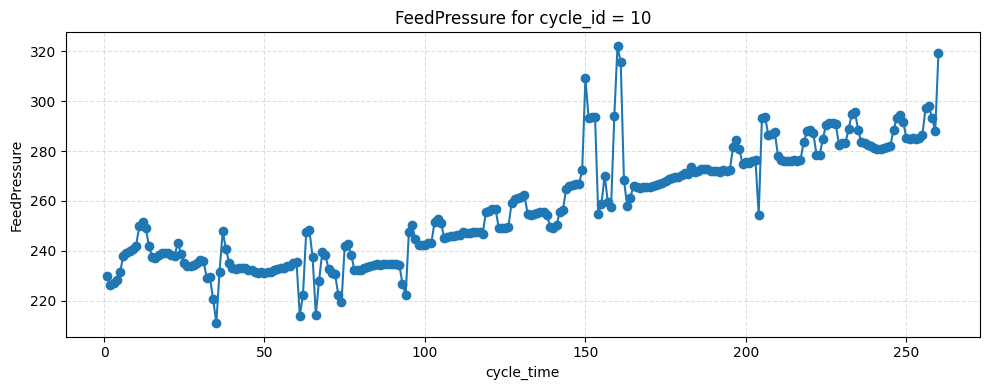

In [13]:
# df = CycleProcessor(signal_col='FeedFlow', df=cp, threshold=10)
CycleProcessor.plot_cycle(cp.df, 10, signal_col='FeedPressure')

In [14]:
from utils.plot.plot_by_cycle import interactive_cycle_plot,plot_by_cycle
interactive_cycle_plot(cp.df, plot_by_cycle)

Output()

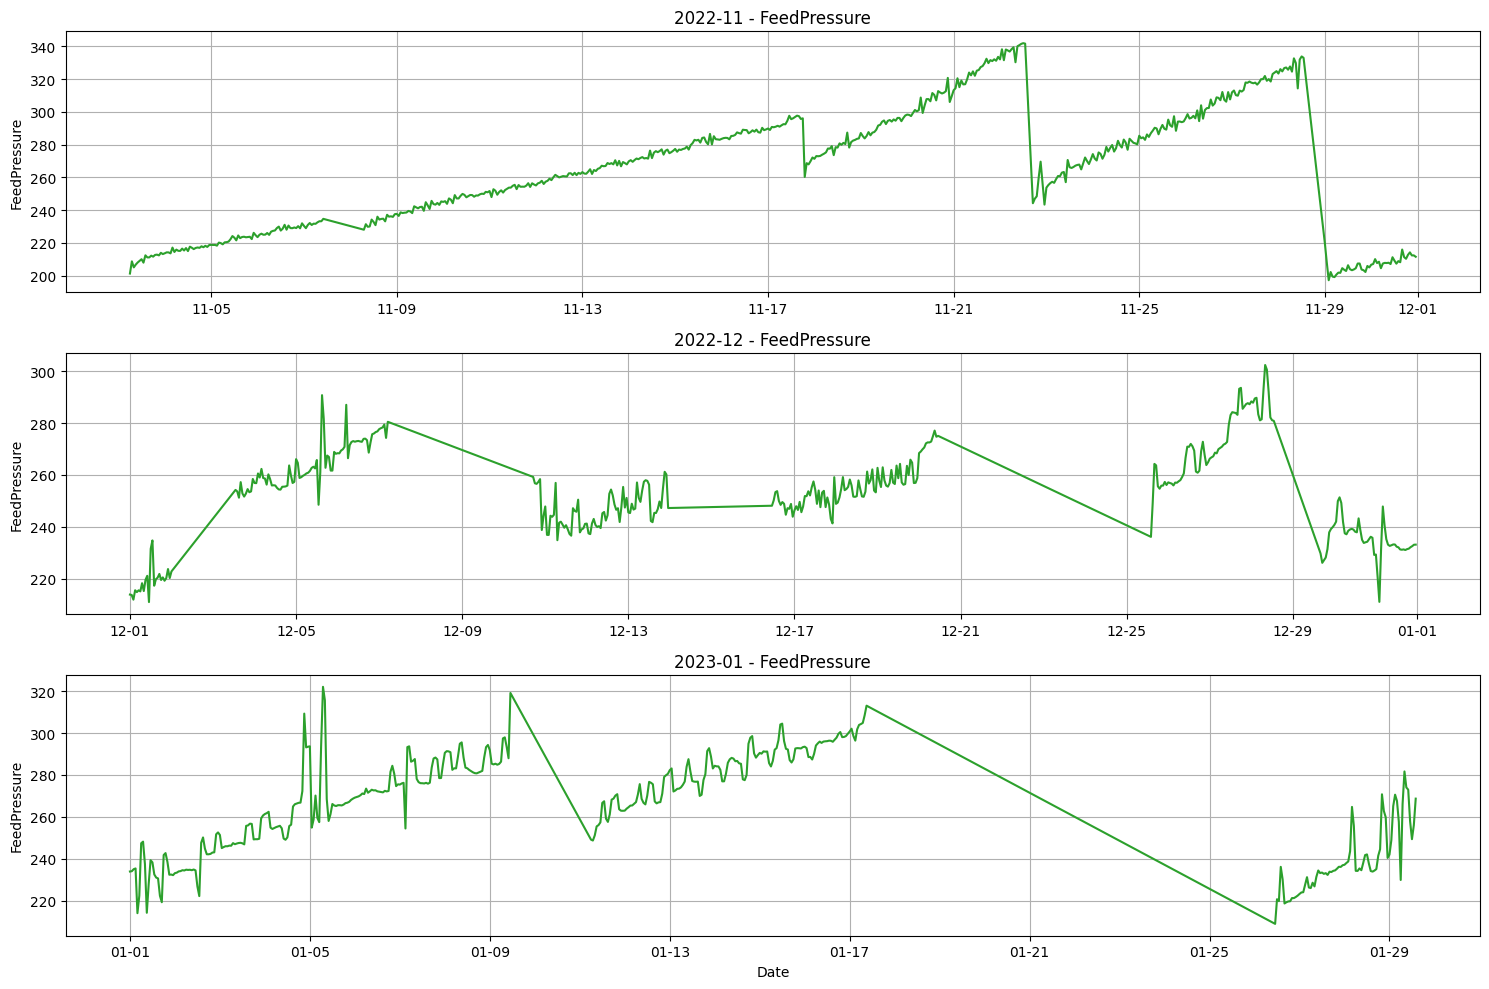

In [15]:
from utils.plot.plot_by_time_period import PlotByTimePeriod

pbt = PlotByTimePeriod(cp.df)
month = ['2022-11', '2022-12','2023-01']
pbt.plot_by_month(month,'FeedPressure')

In [16]:
######## 3 Feature Engineering ##########

from feature_engineering import FeatureEngineering
fe = FeatureEngineering(dp)
# generate cross features excluding cycle_id and cycle_time
fe.generate_cross_features(drop_features=['cycle_id','cycle_time'])
# generate lag features
fe.lag_engineer(drop_features=['timestamp','cycle_id','cycle_time'])
# export to csv           
dp.df = fe.df
dp.export_to_csv('../data/processed/feature_2.csv')

In [17]:
dp.df.columns.tolist()

['timestamp',
 'ConcentrateFlow',
 'ConcentratePressure',
 'FeedConductivity',
 'FeedTemperature',
 'PermeateFlow',
 'cycle_id',
 'cycle_time',
 'ConcentrateFlow_x_ConcentratePressure',
 'ConcentrateFlow_x_FeedConductivity',
 'ConcentrateFlow_x_FeedTemperature',
 'ConcentrateFlow_x_PermeateFlow',
 'ConcentratePressure_x_FeedConductivity',
 'ConcentratePressure_x_FeedTemperature',
 'ConcentratePressure_x_PermeateFlow',
 'FeedConductivity_x_FeedTemperature',
 'FeedConductivity_x_PermeateFlow',
 'FeedTemperature_x_PermeateFlow',
 'ConcentrateFlow_lag_1',
 'ConcentrateFlow_lag_2',
 'ConcentrateFlow_lag_3',
 'ConcentrateFlow_lag_6',
 'ConcentrateFlow_lag_12',
 'ConcentratePressure_lag_1',
 'ConcentratePressure_lag_2',
 'ConcentratePressure_lag_3',
 'ConcentratePressure_lag_6',
 'ConcentratePressure_lag_12',
 'FeedConductivity_lag_1',
 'FeedConductivity_lag_2',
 'FeedConductivity_lag_3',
 'FeedConductivity_lag_6',
 'FeedConductivity_lag_12',
 'FeedTemperature_lag_1',
 'FeedTemperature_lag_2'

In [18]:
fs = [f for f in dp.df.columns if f not in ['timestamp']]
fs

['ConcentrateFlow',
 'ConcentratePressure',
 'FeedConductivity',
 'FeedTemperature',
 'PermeateFlow',
 'cycle_id',
 'cycle_time',
 'ConcentrateFlow_x_ConcentratePressure',
 'ConcentrateFlow_x_FeedConductivity',
 'ConcentrateFlow_x_FeedTemperature',
 'ConcentrateFlow_x_PermeateFlow',
 'ConcentratePressure_x_FeedConductivity',
 'ConcentratePressure_x_FeedTemperature',
 'ConcentratePressure_x_PermeateFlow',
 'FeedConductivity_x_FeedTemperature',
 'FeedConductivity_x_PermeateFlow',
 'FeedTemperature_x_PermeateFlow',
 'ConcentrateFlow_lag_1',
 'ConcentrateFlow_lag_2',
 'ConcentrateFlow_lag_3',
 'ConcentrateFlow_lag_6',
 'ConcentrateFlow_lag_12',
 'ConcentratePressure_lag_1',
 'ConcentratePressure_lag_2',
 'ConcentratePressure_lag_3',
 'ConcentratePressure_lag_6',
 'ConcentratePressure_lag_12',
 'FeedConductivity_lag_1',
 'FeedConductivity_lag_2',
 'FeedConductivity_lag_3',
 'FeedConductivity_lag_6',
 'FeedConductivity_lag_12',
 'FeedTemperature_lag_1',
 'FeedTemperature_lag_2',
 'FeedTemper

In [19]:
print(f'Total Columns (including timestamp): {len(dp.df.columns)}')

Total Columns (including timestamp): 43


In [ ]:
######## 4 Feature Selection ##########

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt
from data_processor import DataProcessor

# 1. Data Preprocessing
# Remove cycle metadata (cycle_id, cycle_time) and timestamp since these should not be inputs for RF
features = [f for f in fs if f not in ['timestamp']]
# Select first 10000 rows for feature selection
selected_inputs_data = dp.df[0:10000]
selected_outputs_data = dp.outputs_df[0:10000]
X_train, X_test, y_train, y_test = train_test_split(selected_inputs_data[features], selected_outputs_data['FeedPressure'], test_size=0.2, random_state=42)

In [21]:
# size of training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 40)
(2000, 40)
(8000,)
(2000,)


In [22]:
 # 2. Train Random Forest
print("Training RandomForest...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

Training RandomForest...


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
# Gets feature importances from RF, sorts features from most to least important. 
# Keeps 4 * top_num of them
top_num = 5
importances = rf.feature_importances_
feature_importance_series = pd.Series(importances, index=X_train.columns)
top_features = feature_importance_series.sort_values(ascending=False).head(4*top_num).index.tolist()
top_features

['ConcentratePressure',
 'ConcentrateFlow_x_FeedConductivity',
 'ConcentrateFlow_x_ConcentratePressure',
 'FeedTemperature_lag_12',
 'FeedConductivity_x_FeedTemperature',
 'FeedTemperature_lag_6',
 'ConcentratePressure_lag_12',
 'ConcentratePressure_x_PermeateFlow',
 'ConcentrateFlow',
 'ConcentrateFlow_x_FeedTemperature',
 'ConcentrateFlow_lag_12',
 'ConcentratePressure_lag_6',
 'FeedConductivity_x_PermeateFlow',
 'FeedTemperature_lag_1',
 'ConcentrateFlow_lag_1',
 'FeedTemperature_lag_3',
 'FeedConductivity_lag_12',
 'ConcentratePressure_x_FeedConductivity',
 'FeedTemperature_lag_2',
 'ConcentrateFlow_lag_2']

In [24]:
# Train again using top features
X_sub = X_train[top_features]
y_sub = y_train
print("Training simple RandomForest...")
rf_small = RandomForestRegressor(n_estimators=100, random_state=42)
rf_small.fit(X_sub, y_sub.values.ravel())
# Build SHAP explainer based on RF
explainer = shap.TreeExplainer(rf_small)
# SHAP refinement
X_sub_sample = X_sub.sample(n=200, random_state=42)
shap_values = explainer.shap_values(X_sub_sample)


Training simple RandomForest...


C:\Users\Boom\AppData\Local\Temp\ipykernel_34572\1918474538.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_sub_sample, feature_names=X_sub.columns, max_display=top_num*2)


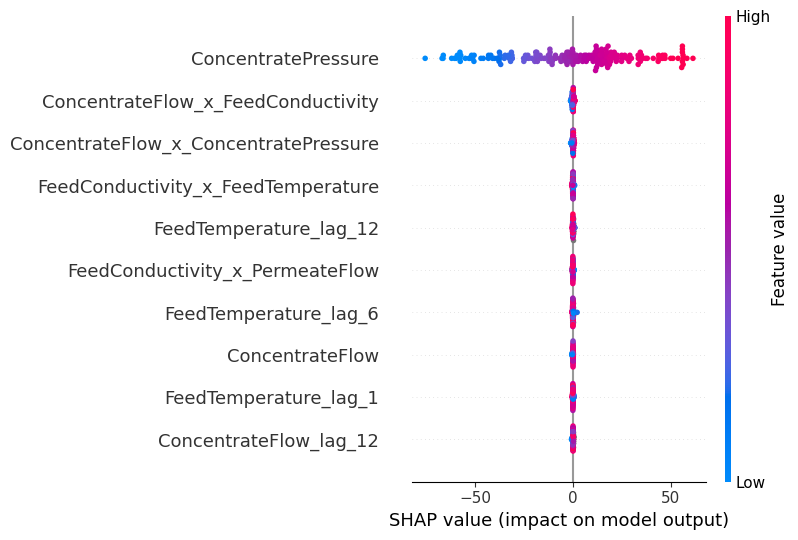

In [25]:
 # 3. SHAP Analysis
shap_importance = pd.Series(np.abs(shap_values).mean(axis=0), index=X_sub.columns)
top_k_features = shap_importance.sort_values(ascending=False).head(top_num*2).index.tolist()

shap.summary_plot(shap_values, X_sub_sample, feature_names=X_sub.columns, max_display=top_num*2)

In [26]:
top_k_features

['ConcentratePressure',
 'ConcentrateFlow_x_FeedConductivity',
 'ConcentrateFlow_x_ConcentratePressure',
 'FeedConductivity_x_FeedTemperature',
 'FeedTemperature_lag_12',
 'FeedConductivity_x_PermeateFlow',
 'FeedTemperature_lag_6',
 'ConcentrateFlow',
 'FeedTemperature_lag_1',
 'ConcentrateFlow_lag_12']

In [27]:
from model.lstm_model.enhanced_lstm import lstm_model
target = ['FeedPressure']
lstm_model(dp, top_k_features, target, feature_name='FeedPressure')

KeyError: "['FeedPressure'] not in index"

Scaler已保存到: ../data/model_data/scaler_x_FeedPressure.pkl
Scaler已保存到: ../data/model_data/scaler_y_FeedPressure.pkl


Epoch 1/100: 100%|██████████| 143/143 [00:05<00:00, 24.57it/s]


Epoch [1/100]  Train Loss: 0.1832  Test Loss: 0.0324


Epoch 2/100: 100%|██████████| 143/143 [00:03<00:00, 38.61it/s]


Epoch [2/100]  Train Loss: 0.0728  Test Loss: 0.0421


Epoch 3/100: 100%|██████████| 143/143 [00:03<00:00, 40.33it/s]


Epoch [3/100]  Train Loss: 0.0665  Test Loss: 0.0089


Epoch 4/100: 100%|██████████| 143/143 [00:02<00:00, 49.50it/s]


Epoch [4/100]  Train Loss: 0.0303  Test Loss: 0.0148


Epoch 5/100: 100%|██████████| 143/143 [00:02<00:00, 52.03it/s]


Epoch [5/100]  Train Loss: 0.0323  Test Loss: 0.0083


Epoch 6/100: 100%|██████████| 143/143 [00:02<00:00, 48.90it/s]


Epoch [6/100]  Train Loss: 0.0223  Test Loss: 0.0076


Epoch 7/100: 100%|██████████| 143/143 [00:02<00:00, 50.25it/s]


Epoch [7/100]  Train Loss: 0.0226  Test Loss: 0.0063


Epoch 8/100: 100%|██████████| 143/143 [00:02<00:00, 49.90it/s]


Epoch [8/100]  Train Loss: 0.0207  Test Loss: 0.0058


Epoch 9/100: 100%|██████████| 143/143 [00:02<00:00, 49.63it/s]


Epoch [9/100]  Train Loss: 0.0193  Test Loss: 0.0118


Epoch 10/100: 100%|██████████| 143/143 [00:02<00:00, 51.96it/s]


Epoch [10/100]  Train Loss: 0.0198  Test Loss: 0.0063


Epoch 11/100: 100%|██████████| 143/143 [00:03<00:00, 45.95it/s]


Epoch [11/100]  Train Loss: 0.0233  Test Loss: 0.0125
Early stopping at epoch 11
R2 Score: 0.9646, MAE: 0.1423


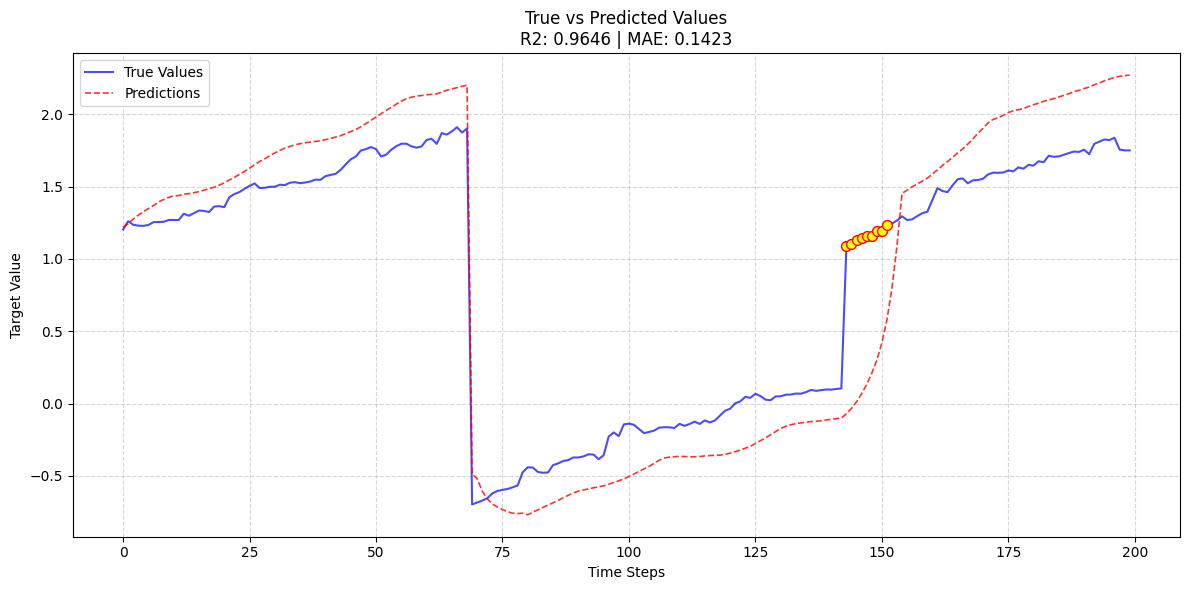

In [28]:
from model.lstm_model.enhanced_lstm import lstm_model

target_col = dp.outputs_df[['FeedPressure']].copy()

# Create a wrapper object or pass data correctly
# Option 1: Create a simple object to hold df
class DataWrapper:
    def __init__(self, df):
        self.df = df

dp_temp = dp.df.copy()
dp_temp['FeedPressure'] = target_col.values

# Wrap it
dp_wrapped = DataWrapper(dp_temp)

target = ['FeedPressure']
lstm_model(dp_wrapped, top_k_features, target, feature_name='FeedPressure')